### 0. 必要なモジュールをimport してください（必要に応じて以下のセルに追記していくこと）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

### 1. ボストン市の住宅価格データをscikit-learnから取得し、データフレームに格納すること。
### なお、住宅価格は「PRICE」とし、一つのデータフレームとする。

↓↓ 以下は、データセットの各カラムの説明 \
（参考） Boston house-prices (ボストン市の住宅価格) \
https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88

In [2]:
# ボストン市の住宅価格のデータのインポート
# データフレーム型に変換
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

### 2. 取得したデータで作成したデータフレームの先頭5行を表示すること

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. 住宅価格の分布をヒストグラムで図示してください。

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

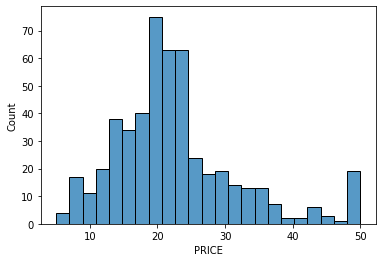

In [4]:
# 住宅価格の分布
sns.histplot(x=df['PRICE'])

### 4. 人口1人当たりの犯罪発生数の分布をヒストグラムで図示してください。なお、ビンの幅は5とすること。 

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

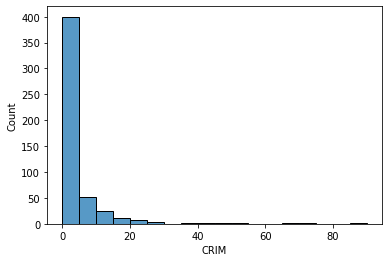

In [5]:
# 人口1人当たりの犯罪発生数の分布
sns.histplot(x=df['CRIM'], binwidth=5)

### 5. 1940年より前に建てられた物件の割合の分布をグラフで図示してください。

<AxesSubplot:xlabel='AGE', ylabel='Count'>

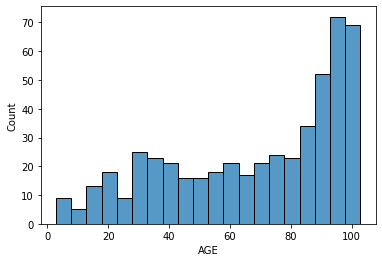

In [6]:
# 1940 年より前に建てられた物件の割合
sns.histplot(df['AGE'], binwidth=5)

### 6. 川の隣かどうか（CHAS） をグラフで図示してください。

<AxesSubplot:xlabel='CHAS', ylabel='count'>

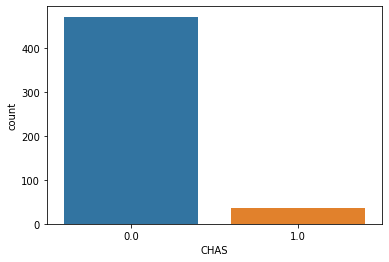

In [7]:
# 川の隣かどうかの数（区画がチャールズ川に面していれば「1」、面していなければ「0」）
sns.countplot(x='CHAS', data=df)

### 7. 犯罪発生率と家賃の関係を散布図で図示してください。

<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

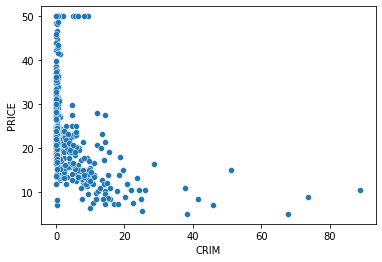

In [8]:
# 犯罪発生率と家賃の関係
sns.scatterplot(x='CRIM', y='PRICE', data=df)

### 8. データセットの以下の変数について、散布図行列を作成し図示してください。
- 人口1人当たりの犯罪発生数
- 25,000平方フィート以上の住居区画の占める割合
- NOx の濃度
- 住居の平均部屋数
- $10,000あたりの不動産税率の総計
- 町毎の児童と教師の比率
- 住宅価格

In [9]:
tmp_df = df.copy()
tmp_df = tmp_df[['CRIM', 'ZN', 'NOX', 'RM', 'TAX', 'PTRATIO', 'PRICE']]

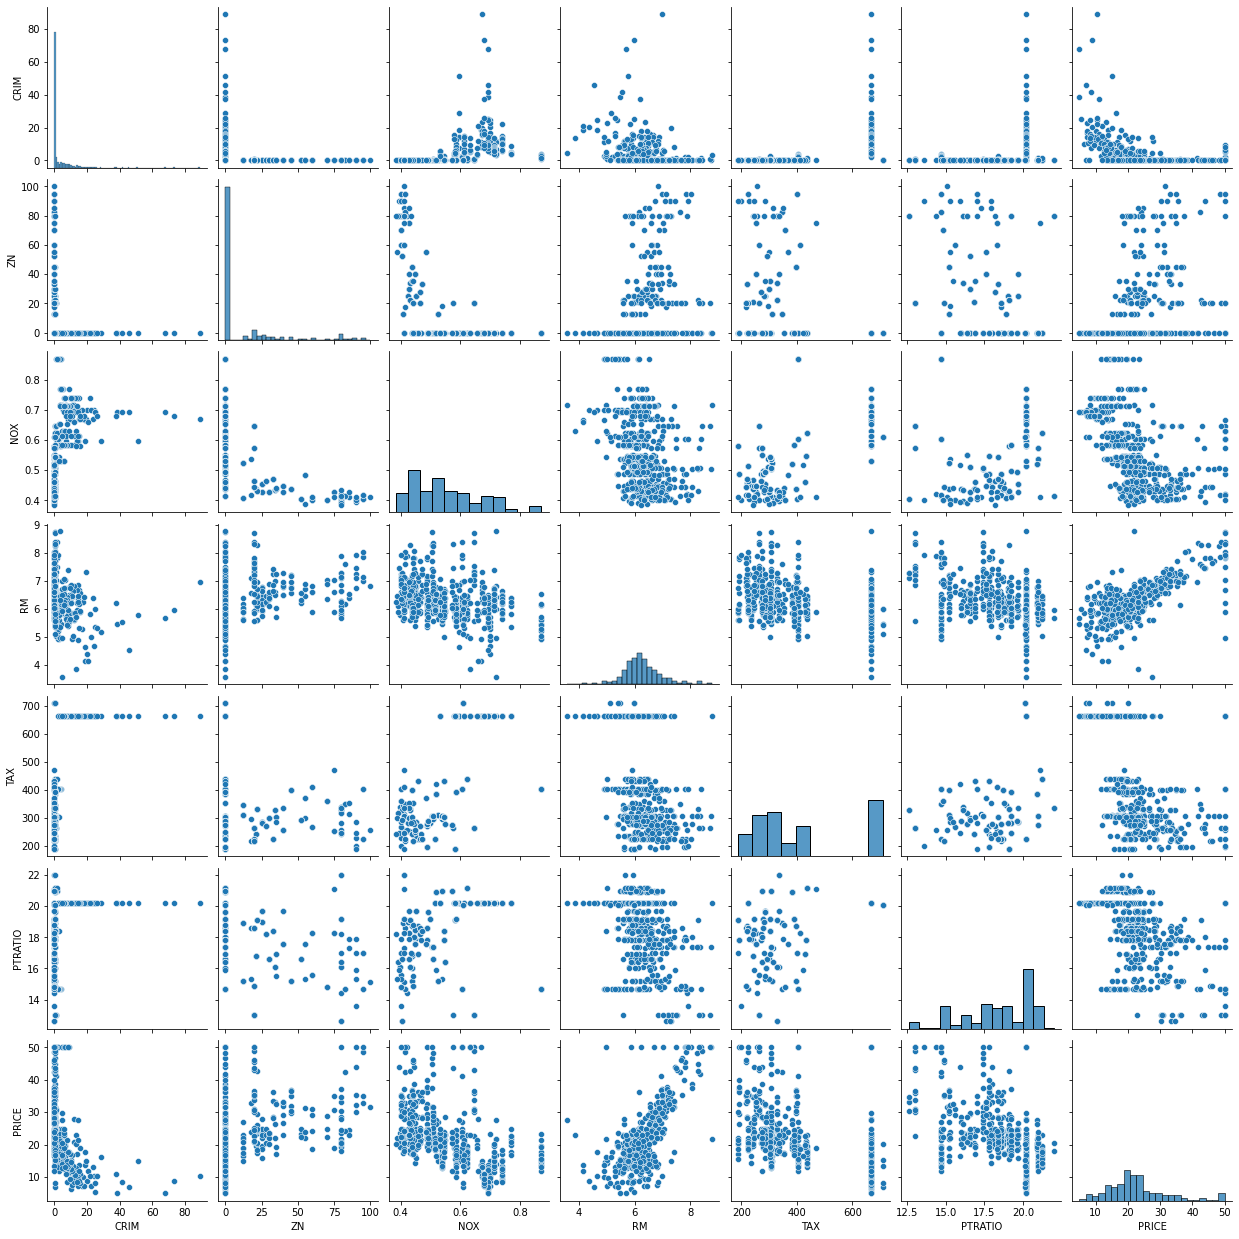

In [10]:
# 指定した変数における散布図行列
sns.pairplot(tmp_df)

### 9. 8.と同様の変数について、変数間の相関をヒートマップで図示してください。

<AxesSubplot:>

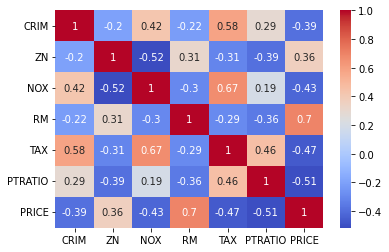

In [11]:
# 指定した変数間の相関をヒートマップで図示
sns.heatmap(tmp_df.corr(), cmap='coolwarm', annot=True)